#### Variation of g with Altitude
Notebook which analyzes the variation of the acceleration due to gravity, g, with altitude.

In [31]:
import numpy as np
import matplotlib.pyplot as plt

Define lists and read data from density.txt

In [34]:
altitude = []
temp = []
gravity = []
pressure = []
density = []
viscosity = []

npoints = 0
with open('density.txt') as f:
    for line in f:
        npoints = npoints+1
        data = line.split()
        altitude.append(float(data[0]))
        temp.append(float(data[1]))
        gravity.append(float(data[2]))
        pressure.append(float(data[3]))
        density.append(float(data[4]))
        viscosity.append(float(data[5]))
        
gravity_uncertainty = [0.001]*len(gravity)

Make graph of g as a function of altitude

Text(0, 0.5, 'Gravity (m/s^2)')

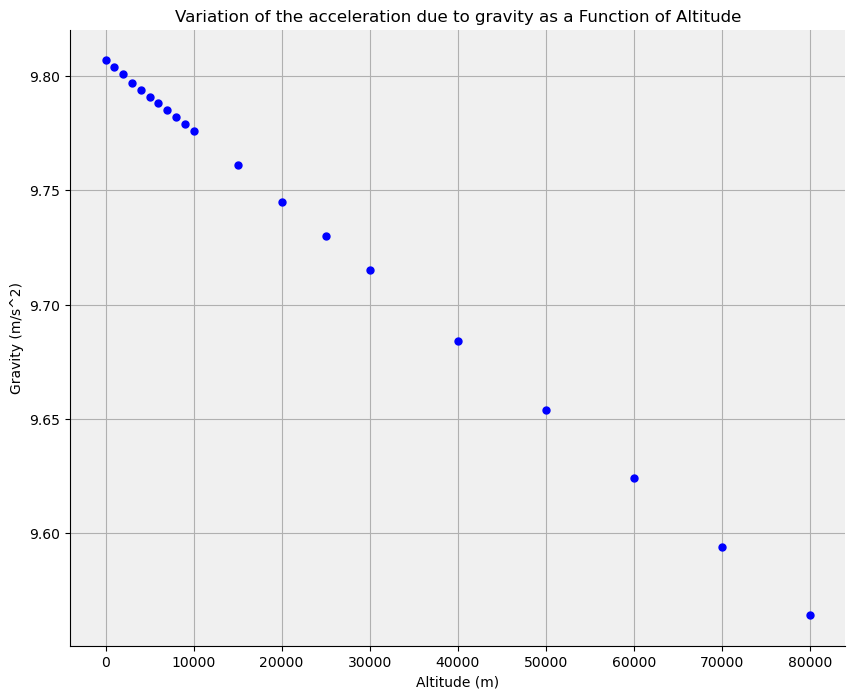

In [35]:
# Create a figure and axes
fig, ax = plt.subplots(figsize=(10, 8))

# Set the grid lines
ax.grid(True)

# Set the background color
ax.set_facecolor('#F0F0F0')

# Set the border properties
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Set the line and marker properties
line_color = 'b'
line_width = 0
marker_color = 'b'
marker_style = 'o'
marker_size = 5

# Create the plot
plt.errorbar(altitude, gravity, yerr=gravity_uncertainty, color=line_color, linewidth=line_width, marker=marker_style, markersize=marker_size, markerfacecolor=marker_color)

# Set the plot title and axis labels
plt.title("Variation of the acceleration due to gravity as a Function of Altitude")
plt.xlabel("Altitude (m)")
plt.ylabel("Gravity (m/s^2)")

From first glance the data seems linear. Make a linear fit function then fit the data.

In [45]:
def fit_function(x, m, b):
        return m * np.array(x) + b

from scipy.optimize import curve_fit

# Because the fit function is linear we can use initial values of zero
init_vals = [0,0]

popt, pcov = curve_fit(fit_function, altitude, gravity, sigma=gravity_uncertainty, absolute_sigma=True, p0=init_vals)
perr = np.sqrt(np.diag(pcov))

print (popt)
print (pcov)
print (perr)

[-3.03863758e-06  9.80635969e+00]
[[ 8.59567964e-17 -1.91253871e-12]
 [-1.91253871e-12  9.25539865e-08]]
[9.27128882e-09 3.04226867e-04]


In [46]:
yfit = []
chi2 = 0
for i in range (0,npoints):
    yfit.append(fit_function(altitude[i],*popt))
    chi2 += (gravity[i]-yfit[i])*(gravity[i]-yfit[i])

print ("Chi^2 / dof = %.3E / %d" % (chi2,npoints-len(init_vals)))

Chi^2 / dof = 3.632E-06 / 18


Draw graph

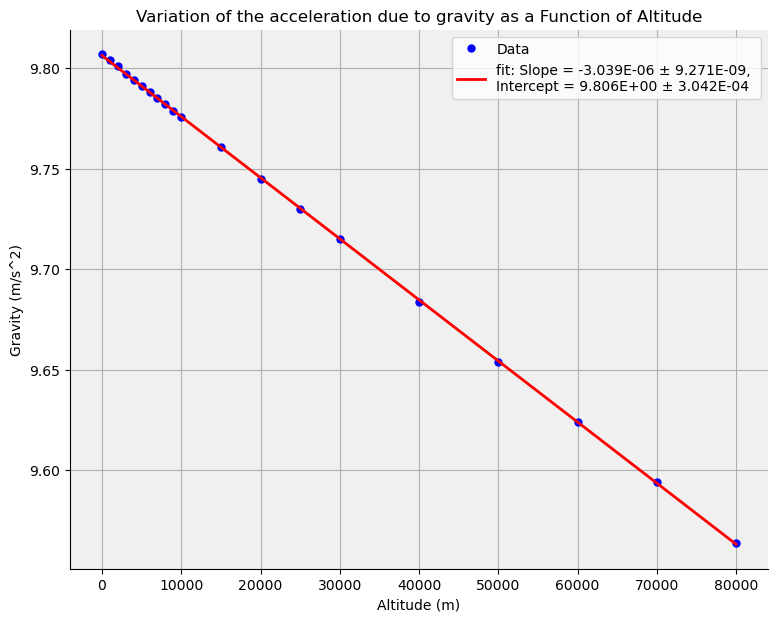

In [48]:
# Create a figure and axes
fig, ax = plt.subplots(figsize=(9, 7))

# Set the grid lines
ax.grid(True)

# Set the background color
ax.set_facecolor('#F0F0F0')

# Set the border properties
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Set the line and marker properties
line_color = 'b'
line_width = 0
marker_color = 'b'
marker_style = 'o'
marker_size = 5

# Create the plot
plt.plot(altitude, gravity, color=line_color, linewidth=line_width,
         marker=marker_style, markersize=marker_size, markerfacecolor=marker_color, label='Data')

plt.plot(altitude,yfit,color='r', linewidth=2, label = f'fit: Slope = {popt[0]:.3E} ± {perr[0]:.3E}, \nIntercept = {popt[1]:.3E} ± {perr[1]:.3E}')

# Set the plot title and axis labels
plt.title("Variation of the acceleration due to gravity as a Function of Altitude")
plt.xlabel("Altitude (m)")
plt.ylabel("Gravity (m/s^2)")
plt.legend()

[0.0, 1000.0, 2000.0, 3000.0, 4000.0, 5000.0, 6000.0, 7000.0, 8000.0, 9000.0, 10000.0, 15000.0, 20000.0, 25000.0, 30000.0, 40000.0, 50000.0, 60000.0, 70000.0, 80000.0] [ 6.52915082e-05  6.92524890e-05  7.32158946e-05 -2.48824574e-05
 -2.09450535e-05 -1.70052368e-05 -1.30630049e-05 -9.11835577e-06
 -5.17128708e-06 -1.22179662e-06  2.73011783e-06  2.25261282e-05
 -6.02293030e-05 -4.04672818e-05 -2.06442354e-05 -8.40750657e-05
 -4.43139761e-05 -4.30499946e-06  3.59541897e-05  7.64659459e-05]


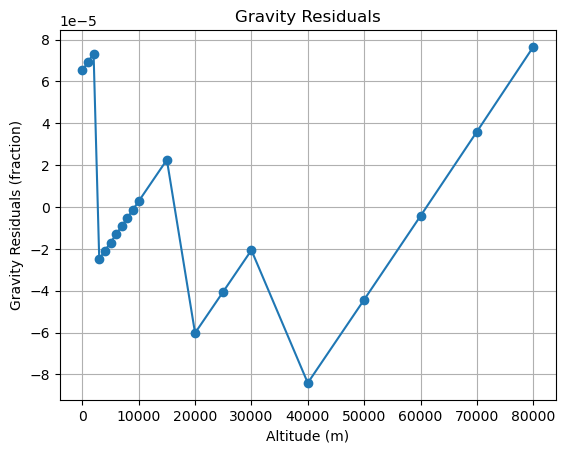

In [57]:
plt.title("Gravity Residuals")
plt.xlabel('Altitude (m)')
plt.ylabel('Gravity Residuals (fraction)')
plt.grid(True)
print(altitude, (gravity - fit_function(altitude, *popt))/gravity)

plt.plot(altitude, (gravity - fit_function(altitude, *popt))/gravity, 'o-')

In graphy_air_density_residuals.ipynb discussed in class, when looking at the residuals as fractions it was decided to add a mathematical component to the model due to the values of the density residuals (-8 at peak). In this scenario, looking at the graph above, the most extreme y value is -8.40750657e-05. Because of this, I believe this is the simplest model that fits the data and another component does not need to be added.